<a href="https://colab.research.google.com/github/sachinoscarkujur/finalproject/blob/main/Copy_of_GEOG5990M_Final_Project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (Template)

Student ID number:201888942

# FIRST VISUALIZATION

This is a non-Spatial data visualization for the dataset of housing prices. The dataset contains many variables related to housing, but only 6 factors contain numeric variables and are considered relevant for the analysis, which are "price", "area", "bedrooms", "bathrooms", "stories" and "parking". During the initial analysis, the necessary packages and data were uploaded and the exploration of the data took place for any missing values, upon doing that no missing values were found, but non-numeric columns were removed from the dataset.
For the analysis, a correlation matrix was used to find the correlation between different variables which may affect the housing prices. the heat map was plotted using yellow, green, and blue colour as it was asked to also consider colour-blind audience.

In [2]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Housing.csv")

#Exploring the data
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Exploring missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [4]:
# Drop non-numberic columns
df = df.drop(columns=["mainroad", "guestroom", "prefarea", "airconditioning", "hotwaterheating", "basement" ,"furnishingstatus"])


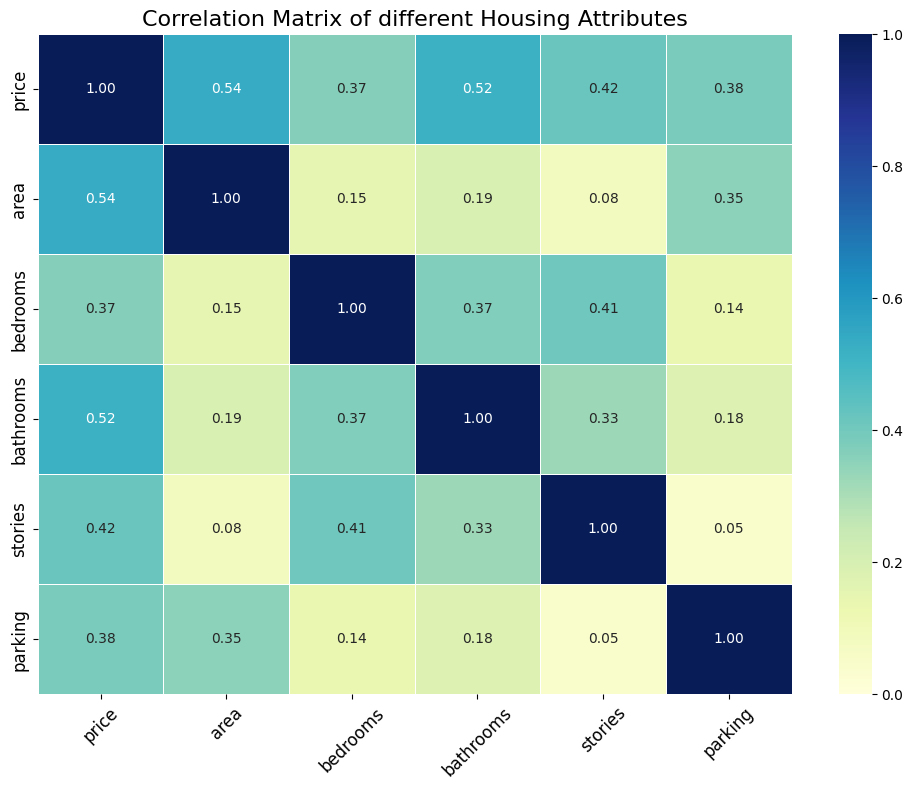

In [5]:
# Select relevant numerical columns
numerical_columns = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
df_corr = df[numerical_columns]

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap with color bar starting from 0
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="YlGnBu",         # Color-blind friendly palette
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10},
    vmin=0                 # Start color scale from 0
)

plt.title("Correlation Matrix of different Housing Attributes", fontsize=16) #heading
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Result**

Looking at the heatmap, we can see few key features:

House Area (0.54 correlation)
Larger homes tend to have higher prices, which shows that Area is the most influential factor in determining price.

Number of Bathrooms (0.52 correlation)
More bathrooms contribute to higher property value.

Number of Stories (0.42 correlation)
Multi-story homes are generally priced higher, usually due to added space and structure.

Parking Availability (0.38 correlation)
Homes with more parking spots tend to cost more.

Bedrooms (0.37 correlation)
While it is an important factor, the number of bedrooms has a weaker relationship to price than bathrooms or area.
so if we are trying to guess a house's price, it would be best to look at its size, number of bathrooms, and whether it has multiple stories or good parking.


# SECOND VISUALIZATION


This is a spatial visualization which uses two data sets of Leeds Accessibility dataset for different key services such as General practitioner, Post office, school, shop distance in kilometers and Leeds shapefile, this visualization presents accessibility of General Practitioner(GP) in Leeds. Initially, required packages were imported and also the two datasets were uploaded and then explored for any missing values in both the datasets. Upon finding that the data does not have any missing values or inappropriate data, no cleaning process was carried out. The coordinate system was checked for the shapefile, which was Projected CRS: EPSG:27700 , Name: OSGB36 / British National Grid, and then both the datasets were joined together using  a common column, which is 'MSOA11CD'. A Choropleth map was used so that data can be presented widely throughout the region and would be easily interpreated by any person without any techinical knowledge, the map was also prepared considering colour-blind audience by using color-blind-friendly palettes.


In [6]:
# import packages

!pip install contextily
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git

# Importing the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 81.6 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-e6anoeh4
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-e6anoeh4
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14724 sha256=b9813b8fb2a0e45f7a66b378a914334f8385026829301a439e649e7fad1bd080
  Stored in directory: /tmp/pip-ephem-wheel-cache-coj_x812/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Succe

In [7]:
# Load dataset
regions = gpd.read_file('Leeds_Accessibility.csv' )
leeds=gpd.read_file('Leeds_MSOA.zip')

In [8]:
# Data-exploring
leeds.head()


,OBJECTID,MSOA11CD,MSOA11NM,LONG,LAT,Location,geometry
0,1716,E02002337,Leeds 008,-1.752,53.880,North,"POLYGON ((418310.512 440995.504, 418283.825 44..."
1,1718,E02002339,Leeds 010,-1.692,53.868,North,"POLYGON ((420442.406 442436.687, 420443.313 44..."
2,1719,E02002340,Leeds 011,-1.678,53.868,North,"POLYGON ((421248.688 442315.812, 421284.072 44..."
3,2527,E02002336,Leeds 007,-1.639,53.883,North,"POLYGON ((422959.334 445561.228, 422975.661 44..."
4,1717,E02002338,Leeds 009,-1.709,53.870,North,"POLYGON ((419597.106 440500.097, 419562.826 44..."


In [9]:
# Data-exploring
regions.head()

,MSOA11CD,GP_dist,PO_dist,School_dist,Shop_dist
0,E02002337,1.053273,1.268455,0.796909,0.727182
1,E02002338,1.106091,1.255364,0.705091,0.682727
2,E02002339,0.928857,1.253929,0.712857,0.536571
3,E02002340,0.8887,1.1528,0.8043,0.4775
4,E02002341,1.094421,1.649316,0.935105,0.767158


In [10]:
#Exploring missing values
regions.isnull().sum()

,0
MSOA11CD,0
GP_dist,0
PO_dist,0
School_dist,0
Shop_dist,0


In [11]:
# crs used in the shapefile dataset
leeds.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [12]:
# joining the csv dataset and shapefile dataset using the common column in both
regions_1 = regions.merge(leeds, left_on='MSOA11CD', right_on='MSOA11CD', how='left')

In [13]:
# exploring the merged datasets
regions_1.head()

,MSOA11CD,GP_dist,PO_dist,School_dist,Shop_dist,OBJECTID,MSOA11NM,LONG,LAT,Location,geometry
0,E02002337,1.053273,1.268455,0.796909,0.727182,1716,Leeds 008,-1.752,53.880,North,"POLYGON ((418310.512 440995.504, 418283.825 44..."
1,E02002338,1.106091,1.255364,0.705091,0.682727,1717,Leeds 009,-1.709,53.870,North,"POLYGON ((419597.106 440500.097, 419562.826 44..."
2,E02002339,0.928857,1.253929,0.712857,0.536571,1718,Leeds 010,-1.692,53.868,North,"POLYGON ((420442.406 442436.687, 420443.313 44..."
3,E02002340,0.8887,1.1528,0.8043,0.4775,1719,Leeds 011,-1.678,53.868,North,"POLYGON ((421248.688 442315.812, 421284.072 44..."
4,E02002341,1.094421,1.649316,0.935105,0.767158,1720,Leeds 012,-1.556,53.870,North,"POLYGON ((428620.336 443924.493, 428632.219 44..."


In [14]:
# assigning the geometry
regions_1 = regions_1.set_geometry('geometry') # Assuming 'geometry_x' from 'regions' is the desired geometry

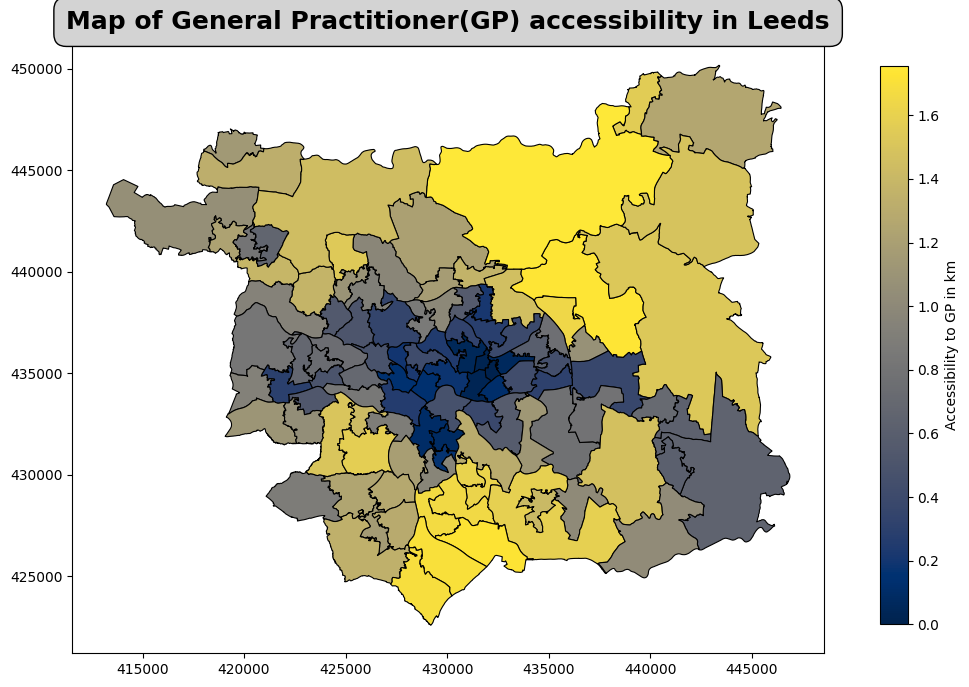

In [15]:
# Visualization
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

# Defining a color map
cmap = sns.color_palette("cividis", as_cmap=True)

# Plot the map with legend

regions_1.plot(column="GP_dist", cmap=cmap, linewidth=0.8, edgecolor="black",
               legend=False, ax=ax,
               legend_kwds={"label": "Accessibility from GP_dist",
                            "shrink": 0.5,
                            "format": "%.1f"})

# Set legend to start from 0
norm = plt.Normalize(vmin=0, vmax=regions_1["GP_dist"].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.04)
cbar.set_label("Accessibility to GP in km")

# Customize the appearance
ax.set_title("Map of General Practitioner(GP) accessibility in Leeds", fontsize=18, fontweight="bold",
             bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.5"), loc="center")
ax.axis("on")  # show axes


# Show the plot
plt.show()

**Result**

Access to healthcare is a fundamental need, and mapping GP accessibility across Leeds helps uncover areas where residents might struggle to reach medical services easily. From this analysis, we see clear variations some neighborhoods are well-connected, while others face longer journeys to reach a GP.

Understanding these disparities is crucial for improving healthcare equity. Local authorities could use these insights to plan better transport links, expand medical facilities, or refine policies to ensure underserved communities get the support they need. Future studies might explore how accessibility connects with population density, income levels, and public transport availability to create an even clearer picture of healthcare access in the city.

# Acknowledgement:
**I acknowledge the use of Microsoft Copilot (Co Pilot, https://copilot.microsoft.com/chats/mNdTZ381WF4J3fqtaFFP3) to understand the error codes, searching for the datset and to proofread my writings.**